**Standardization and Normalization**

- Standardization and Normalization are two methods to convert data values into same scale
- It is also called scaling of data
- In the data we have many columns, each columns have different units and different values
- For example: You have age and salary; age is minimal two digit number and salary is kind of a 5 digit number
- When you multiply 2 digit number with 5 digit number it invloves some complexity
- Imagine you are multiplying both single digit number, this involves less complexity
- Scaling converts all the data into same scale
- $Standardization$:
    - It is also called z-score or z-scale
    - It ranges -3 to 3
    - The mean = 0 and std = 1
    
     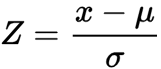


- $Normalization$:
    - Min Max scalar
    - Normalization converts data into 0 to 1 range
    - min_value = 0 and max_value = 1
    - It is mainly used in deep learning for the image scaling
    - Generally images are color images the pixel value ranges from 0 to 255
    - We normalize the values into 0 to 1
    - The value might be changed but information never change

      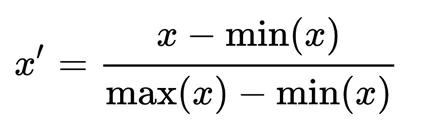

**Import the packages**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Read the data**

In [5]:
file_loc="C:\\Users\\ashux\\OneDrive\\Python Notes\\New folder\\visa_application_data.csv"
visa_df=pd.read_csv(file_loc)
visa_df.head()

,Case_ID,Applicant_Name,Prevailing_Wage,Continent,No_of_Employees,Company_Income,Case_Status,Job_Title,Education_Level,Years_of_Experience,Employer_Country,Application_Fee
0,CASE000001,Applicant_1,89778.08,Europe,5336,25360857.96,Denied,Software Engineer,Masters,9,USA,3723.52
1,CASE000002,Applicant_2,95104.11,Asia,804,19206118.15,Denied,Technician,Bachelors,13,USA,1063.66
2,CASE000003,Applicant_3,64302.17,Europe,2641,3369627.28,Granted,Data Analyst,PhD,13,USA,4848.31
3,CASE000004,Applicant_4,82393.24,Asia,6328,64794922.52,Granted,Technician,Masters,5,Canada,3728.38
4,CASE000005,Applicant_5,92592.03,South America,4820,80146308.30,Denied,Software Engineer,Bachelors,16,USA,2741.70


**Z-Score**

- Step-1 : We read a specific column (Prevailing_Wage)
- Step-2 : Calculate mean of the column
- Step-3 : Calculate std of the column
- Step-4 : nr = column - mean
- Step-5 : nr/std

In [7]:
#Step-1
visa_df['Prevailing_Wage']

#Step-2
mean=visa_df['Prevailing_Wage'].mean()

#Step-3
std=visa_df['Prevailing_Wage'].std()

#Step-4
nr=visa_df['Prevailing_Wage']-mean

#Step-5
out=nr/std


visa_df['Prevailing_Wage_Zscore']=out

visa_df.head()

,Case_ID,Applicant_Name,Prevailing_Wage,Continent,No_of_Employees,Company_Income,Case_Status,Job_Title,Education_Level,Years_of_Experience,Employer_Country,Application_Fee,Prevailing_Wage_Zscore
0,CASE000001,Applicant_1,89778.08,Europe,5336,25360857.96,Denied,Software Engineer,Masters,9,USA,3723.52,0.004261
1,CASE000002,Applicant_2,95104.11,Asia,804,19206118.15,Denied,Technician,Bachelors,13,USA,1063.66,0.158263
2,CASE000003,Applicant_3,64302.17,Europe,2641,3369627.28,Granted,Data Analyst,PhD,13,USA,4848.31,-0.732372
3,CASE000004,Applicant_4,82393.24,Asia,6328,64794922.52,Granted,Technician,Masters,5,Canada,3728.38,-0.209271
4,CASE000005,Applicant_5,92592.03,South America,4820,80146308.30,Denied,Software Engineer,Bachelors,16,USA,2741.70,0.085626


In [8]:
visa_df[['Prevailing_Wage','Prevailing_Wage_Zscore']]

,Prevailing_Wage,Prevailing_Wage_Zscore
0,89778.08,0.004261
1,95104.11,0.158263
2,64302.17,-0.732372
3,82393.24,-0.209271
4,92592.03,0.085626
...,...,...
24995,72084.30,-0.507352
24996,145050.11,1.602446
24997,103267.45,0.394305
24998,96480.30,0.198055


In [9]:
max_original=visa_df['Prevailing_Wage'].max()
max_z=visa_df['Prevailing_Wage_Zscore'].max()
max_original,max_z

(149993.25, 1.7453767224582153)

In [10]:
visa_df['Prevailing_Wage'].idxmax()

# Prevailing_Wage column has maximum value at 12889 ID

12889

In [11]:
visa_df['Prevailing_Wage_Zscore'].idxmax()

# Prevailing_Wage_Zscore column has maximum value at 12889 ID

12889

In [12]:
visa_df.iloc[[12889]]

,Case_ID,Applicant_Name,Prevailing_Wage,Continent,No_of_Employees,Company_Income,Case_Status,Job_Title,Education_Level,Years_of_Experience,Employer_Country,Application_Fee,Prevailing_Wage_Zscore
12889,CASE012890,Applicant_12890,149993.25,North America,2653,94571189.51,Denied,Technician,Bachelors,15,Canada,1133.21,1.745377


In [13]:
min_original=visa_df['Prevailing_Wage'].min()
min_z=visa_df['Prevailing_Wage_Zscore'].min()
min_original,min_z

(30003.26, -1.7241213365624768)

In [14]:
visa_df['Prevailing_Wage'].idxmin()

# Prevailing_Wage column has minimum value at 22559 ID

22559

In [15]:
visa_df['Prevailing_Wage_Zscore'].idxmin()

# Prevailing_Wage_Zscore column has minimum value at 22559 ID

22559

In [16]:
visa_df.iloc[[22559]]

,Case_ID,Applicant_Name,Prevailing_Wage,Continent,No_of_Employees,Company_Income,Case_Status,Job_Title,Education_Level,Years_of_Experience,Employer_Country,Application_Fee,Prevailing_Wage_Zscore
22559,CASE022560,Applicant_22560,30003.26,North America,1479,26680695.76,Granted,Consultant,Masters,13,UK,509.58,-1.724121


**Influencial outliers**

- Generally Outlier means very very huge obsevation or very very small observation
- If we found an observation as outlier before scaling
- The same observation again found as outlier after scaling
- Then that observation called influential outlier
- Some observation before scaling consider as outlier
- But after scaling it does not fall in outlier creteria
- At that time we might not consider that observation as outlier
- Z-score is used to identify influecial outliers

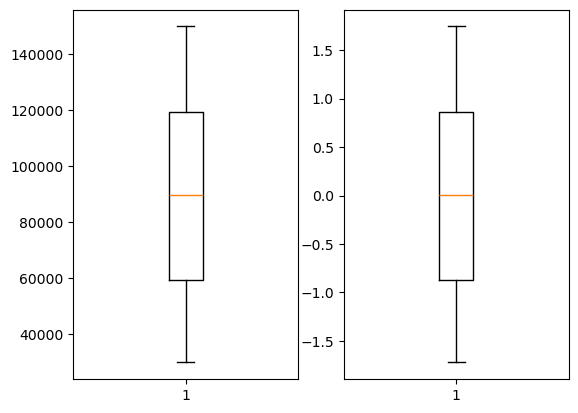

In [18]:
plt.subplot(1,2,1)
plt.boxplot(visa_df['Prevailing_Wage'])
plt.subplot(1,2,2)
plt.boxplot(visa_df['Prevailing_Wage_Zscore'])
plt.show()

In [19]:
file_loc="C:\\Users\\ashux\\OneDrive\\Python Notes\\New folder\\visa_application_data.csv"
visa_df=pd.read_csv(file_loc)
visa_df.head()

,Case_ID,Applicant_Name,Prevailing_Wage,Continent,No_of_Employees,Company_Income,Case_Status,Job_Title,Education_Level,Years_of_Experience,Employer_Country,Application_Fee
0,CASE000001,Applicant_1,89778.08,Europe,5336,25360857.96,Denied,Software Engineer,Masters,9,USA,3723.52
1,CASE000002,Applicant_2,95104.11,Asia,804,19206118.15,Denied,Technician,Bachelors,13,USA,1063.66
2,CASE000003,Applicant_3,64302.17,Europe,2641,3369627.28,Granted,Data Analyst,PhD,13,USA,4848.31
3,CASE000004,Applicant_4,82393.24,Asia,6328,64794922.52,Granted,Technician,Masters,5,Canada,3728.38
4,CASE000005,Applicant_5,92592.03,South America,4820,80146308.30,Denied,Software Engineer,Bachelors,16,USA,2741.70


**Using Package - StandardScalar**

In [20]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

visa_df[['Prevailing_Wage_Zscore']]=ss.fit_transform(visa_df[['Prevailing_Wage']])
visa_df

,Case_ID,Applicant_Name,Prevailing_Wage,Continent,No_of_Employees,Company_Income,Case_Status,Job_Title,Education_Level,Years_of_Experience,Employer_Country,Application_Fee,Prevailing_Wage_Zscore
0,CASE000001,Applicant_1,89778.08,Europe,5336,25360857.96,Denied,Software Engineer,Masters,9,USA,3723.52,0.004261
1,CASE000002,Applicant_2,95104.11,Asia,804,19206118.15,Denied,Technician,Bachelors,13,USA,1063.66,0.158266
2,CASE000003,Applicant_3,64302.17,Europe,2641,3369627.28,Granted,Data Analyst,PhD,13,USA,4848.31,-0.732387
3,CASE000004,Applicant_4,82393.24,Asia,6328,64794922.52,Granted,Technician,Masters,5,Canada,3728.38,-0.209275
4,CASE000005,Applicant_5,92592.03,South America,4820,80146308.30,Denied,Software Engineer,Bachelors,16,USA,2741.70,0.085628
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,CASE024996,Applicant_24996,72084.30,Asia,8107,69871566.78,Granted,Data Analyst,Bachelors,5,Canada,4342.84,-0.507363
24996,CASE024997,Applicant_24997,145050.11,Africa,9086,48554645.76,Granted,Consultant,Masters,1,Germany,2070.72,1.602478
24997,CASE024998,Applicant_24998,103267.45,Asia,3361,71378922.33,Granted,Data Analyst,Bachelors,16,Canada,4487.88,0.394313
24998,CASE024999,Applicant_24999,96480.30,Asia,4431,53822916.81,Denied,Software Engineer,PhD,5,USA,2186.99,0.198059


**min max scaler**

- Step-1 : Read the column
- Step-2 : Calculate min value
- Step-3 : Calculate max value
- Step-4 : Nr = Column - min
- Step-5 : Dr = max - min
- Step-6 : out = Nr/Dr
- Step-7 : Save in a new column

In [23]:
file_loc="C:\\Users\\ashux\\OneDrive\\Python Notes\\New folder\\visa_application_data.csv"
visa_df=pd.read_csv(file_loc)

min_val=visa_df['Prevailing_Wage'].min()
max_val=visa_df['Prevailing_Wage'].max()
Nr=visa_df['Prevailing_Wage']-min_val
Dr=max_val-min_val
out=Nr/Dr
visa_df['Prevailing_Wage_norm']=out
visa_df

,Case_ID,Applicant_Name,Prevailing_Wage,Continent,No_of_Employees,Company_Income,Case_Status,Job_Title,Education_Level,Years_of_Experience,Employer_Country,Application_Fee,Prevailing_Wage_norm
0,CASE000001,Applicant_1,89778.08,Europe,5336,25360857.96,Denied,Software Engineer,Masters,9,USA,3723.52,0.498165
1,CASE000002,Applicant_2,95104.11,Asia,804,19206118.15,Denied,Technician,Bachelors,13,USA,1063.66,0.542552
2,CASE000003,Applicant_3,64302.17,Europe,2641,3369627.28,Granted,Data Analyst,PhD,13,USA,4848.31,0.285848
3,CASE000004,Applicant_4,82393.24,Asia,6328,64794922.52,Granted,Technician,Masters,5,Canada,3728.38,0.436620
4,CASE000005,Applicant_5,92592.03,South America,4820,80146308.30,Denied,Software Engineer,Bachelors,16,USA,2741.70,0.521617
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,CASE024996,Applicant_24996,72084.30,Asia,8107,69871566.78,Granted,Data Analyst,Bachelors,5,Canada,4342.84,0.350705
24996,CASE024997,Applicant_24997,145050.11,Africa,9086,48554645.76,Granted,Consultant,Masters,1,Germany,2070.72,0.958804
24997,CASE024998,Applicant_24998,103267.45,Asia,3361,71378922.33,Granted,Data Analyst,Bachelors,16,Canada,4487.88,0.610586
24998,CASE024999,Applicant_24999,96480.30,Asia,4431,53822916.81,Denied,Software Engineer,PhD,5,USA,2186.99,0.554022


In [24]:
visa_df[['Prevailing_Wage','Prevailing_Wage_norm']]

,Prevailing_Wage,Prevailing_Wage_norm
0,89778.08,0.498165
1,95104.11,0.542552
2,64302.17,0.285848
3,82393.24,0.436620
4,92592.03,0.521617
...,...,...
24995,72084.30,0.350705
24996,145050.11,0.958804
24997,103267.45,0.610586
24998,96480.30,0.554022


In [25]:
visa_df['Prevailing_Wage'].idxmax(),visa_df["Prevailing_Wage_norm"].idxmax()

(12889, 12889)

In [26]:
visa_df['Prevailing_Wage'].idxmin(),visa_df["Prevailing_Wage_norm"].idxmin()

(22559, 22559)

**Using Package name - MinMaxScalar**

In [49]:
file_loc="C:\\Users\\ashux\\OneDrive\\Python Notes\\New folder\\visa_application_data.csv"
visa_df=pd.read_csv(file_loc)

from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
visa_df['Prevailing_Wage_Norm']=mm.fit_transform(visa_df[['Prevailing_Wage']])

visa_df[['Prevailing_Wage','Prevailing_Wage_Norm']].head()

,Prevailing_Wage,Prevailing_Wage_Norm
0,89778.08,0.498165
1,95104.11,0.542552
2,64302.17,0.285848
3,82393.24,0.436620
4,92592.03,0.521617


**fit_transform**

- There are two terms fit and transform
- If you see in z-score
    - x : data
    - mean : mean of data
    - std : std of data
- Will find the value of mean and std, this is called fit
- Once we find the values we need to apply it on entire data, this is called transform
- Fit_transform calculate the measurements (parameters or statistic) and apply on data